# Projeto 1 - Ciência dos Dados

Nome: Matheus Pereira Belarmino

Nome: Augusto Ricardo Ferreira

Nome: Diogo Gingler Diniz

Atenção: Serão permitidos grupos de até 4 pessoas, mas com uma rubrica mais exigente. 

___
Carregando algumas bibliotecas:

In [70]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [71]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\D\OneDrive - Insper - Institudo de Ensino e Pesquisa\Documentos\INSPER\2024\terceirosemestre\Cdados\Projeto 1\Projeto1-Cdados-24


Carregando a base de dados com as mensagens dos seus arquivos:

In [72]:
train = pd.read_csv('dados_treino_TRIO_matheuspb.csv')
train.head(5)

,sentence,target
0,If the reasoning is from initial facts to an u...,HG
1,The use of information technology in governmen...,HG
2,"Additionally, players should always gamble res...",AI
3,Search filters: Make sure the job site has sea...,AI
4,Yes‚ these accounts were sometimes hidden‚ Mic...,HG


In [73]:
test = pd.read_csv('dados_teste_TRIO_matheuspb.csv')
test.head(5)

,sentence,target
0,com offers a search engine that emphasizes inf...,HG
1,Cyberpunk typically features protagonists who ...,AI
2,They are often used in data centers and other ...,AI
3,"In the late 1990s and early 2000s, the popular...",AI
4,"Stacks are commonly used in programming, espec...",AI


___
## Classificador automático


Faça aqui uma descrição do seu assunto e o contexto referente aos rótulos cujas mensagens (ou reviews) deverão ser classificadas.

ESCREVA AQUI...

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [74]:
pd.read_csv('dados_teste_TRIO_matheuspb.csv')

,sentence,target
0,com offers a search engine that emphasizes inf...,HG
1,Cyberpunk typically features protagonists who ...,AI
2,They are often used in data centers and other ...,AI
3,"In the late 1990s and early 2000s, the popular...",AI
4,"Stacks are commonly used in programming, espec...",AI
...,...,...
625,EPS (Encapsulated PostScript) is a vector-base...,HG
626,Data that is highly secure may be more difficu...,AI
627,9 and V1.,HG
628,Collaboration: Allows users to collaborate on ...,AI


In [75]:
def limpa_texto(texto):
    caractere_especial = ['”','“','‚', '!', '@', '¨', '#', '$',  '%', '&', '*', '?', '"','.','-','(',')',':']
    texto_limpo = ''
    for letra in texto:
        if letra not in  caractere_especial:
            letra_nova = letra.lower()
            texto_limpo += letra_nova
    return texto_limpo

# limpeza do test
test['sentence'] = test['sentence'].apply(limpa_texto)
test['target'].value_counts()

# limpeza do train
train['sentence'] = train['sentence'].apply(limpa_texto)
train['target'].value_counts()


target
AI    787
HG    683
Name: count, dtype: int64

In [76]:
def separador_texto(dt,tag):
    k=0
    texto=''

    if tag == 'HG' or tag == 'AI':
        frases= dt[dt['target'] == tag]['sentence']
        for i in frases:
            texto += i
    else:
        while k < len(dt['sentence']):
            texto += dt['sentence'][k]

            k+=1

    return pd.Series(texto.split()).value_counts(True)

palavras_AI = separador_texto(train,'AI')
palavras_HG = separador_texto(train,'HG')

quantidade_AI = len(palavras_AI)
quantidade_HG =len(palavras_HG)
total_palavras = quantidade_HG + quantidade_AI

prob_AI = palavras_AI/total_palavras
prob_HG = palavras_HG/total_palavras

prob_AI

and                       6.152023e-06
the                       4.827528e-06
to                        3.749115e-06
of                        3.531985e-06
a                         3.314855e-06
                              ...     
competitorsmaintaining    7.237674e-09
success                   7.237674e-09
campaigngates             7.237674e-09
2000,                     7.237674e-09
wellbeing,                7.237674e-09
Name: proportion, Length: 4156, dtype: float64

In [77]:
def calcula_probabilidade(target, comentario, palavras_target, total_target, total_palavras):
    prob_condicional = 1

    for palavra in comentario.split():
        prob_palavra = palavras_target.get(palavra, 1 / (total_target + total_palavras))

        prob_condicional *= prob_palavra

    prob_a_priori = total_target / total_palavras
    probabilidade = prob_condicional * prob_a_priori

    return probabilidade


___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [90]:
acertos_AI = 0
acertos_HG = 0
erros_AI = 0
erros_HG = 0

for comentario, categoria_real in zip(test['sentence'], test['target']):

    prob_AI = calcula_probabilidade('AI', comentario, palavras_AI, quantidade_AI, total_palavras)
    prob_HG = calcula_probabilidade('HG', comentario, palavras_HG, quantidade_HG, total_palavras)

    previsao_categoria = 'AI' if prob_AI > prob_HG else 'HG'

    # avalia os acertos e erros
    if previsao_categoria == categoria_real:
        if previsao_categoria == 'AI':
            acertos_AI += 1
        else:
            acertos_HG += 1
    else:
        if categoria_real == 'AI':
            erros_AI += 1
        else:
            erros_HG += 1

# calculo dos totais ai e hg
total_AI = acertos_AI + erros_AI
total_HG = acertos_HG + erros_HG
total = total_AI + total_HG

# calculo das perfomances
verdadeiro_positivo = (acertos_AI / total_AI) * 100

verdadeiro_negativo = (acertos_HG / total_HG) * 100

verdadeiro_total = ((acertos_AI + acertos_HG) / total) 

falso_positivo = (erros_HG / total_HG) * 100

falso_negativo = (erros_AI / total_AI) * 100

acuracia = verdadeiro_total * 100 




In [91]:
print(f"Acurácia: {acuracia:.2f}")
print(f"Verdadeiro Positivo (AI): {verdadeiro_positivo:.2f}")
print(f"Verdadeiro Negativo (HG): {verdadeiro_negativo:.2f}")
print(f"Falso Positivo (HG): {falso_positivo:.2f}")
print(f"Falso Negativo (AI): {falso_negativo:.2f}")

Acurácia: 77.62
Verdadeiro Positivo (AI): 84.77
Verdadeiro Negativo (HG): 68.79
Falso Positivo (HG): 31.21
Falso Negativo (AI): 15.23


___
### Concluindo

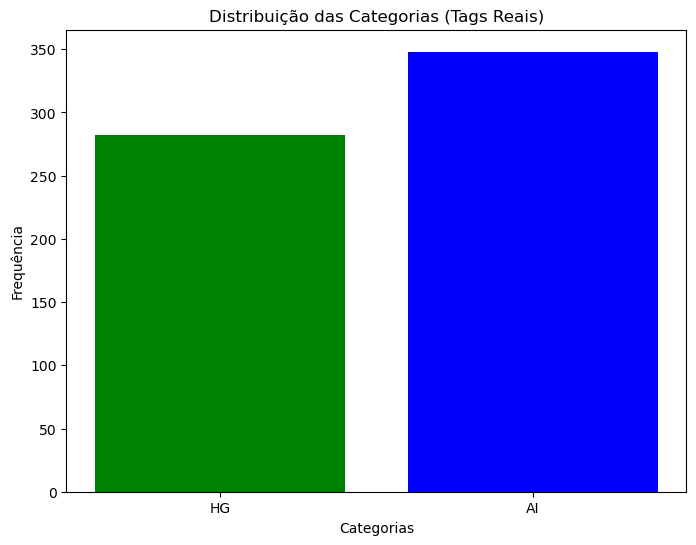

In [95]:
tags_reais = test['target'].tolist()
categorias = ['HG','AI']
frequencia = [tags_reais.count('HG'), tags_reais.count('AI')]

plt.figure(figsize=(8, 6))
plt.bar(categorias, frequencia, color=['green', 'blue'])
plt.xlabel('Categorias')
plt.ylabel('Frequência')
plt.title('Distribuição das Categorias (Tags Reais)')
plt.show()

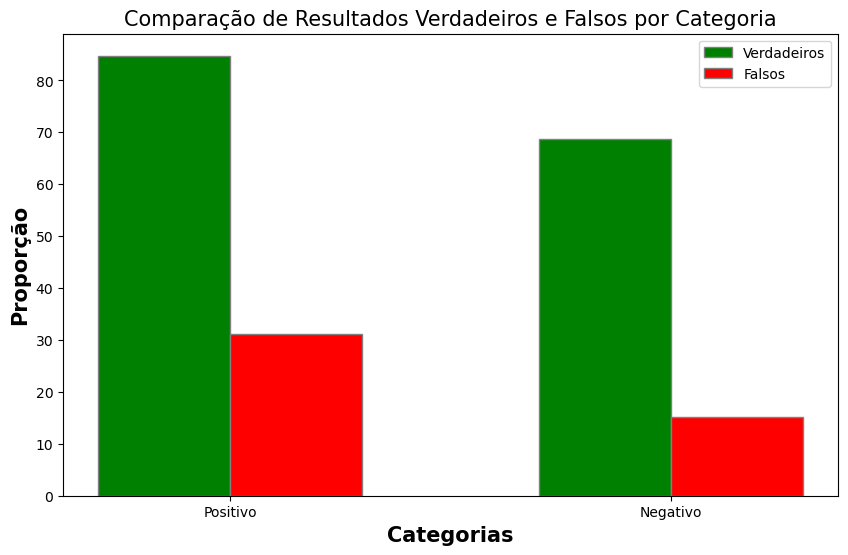

In [96]:
verdadeiros = [verdadeiro_positivo, verdadeiro_negativo]
falsos = [falso_positivo, falso_negativo]
categorias = ['Positivo', 'Negativo']


plt.figure(figsize=(10, 6))
barWidth = 0.3

r1 = range(len(verdadeiros))
r2 = [x + barWidth for x in r1]
 

plt.bar(r1, verdadeiros, color='green', width=barWidth, edgecolor='grey', label='Verdadeiros')
plt.bar(r2, falsos, color='red', width=barWidth, edgecolor='grey', label='Falsos')

plt.xlabel('Categorias', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth/2 for r in range(len(verdadeiros))], categorias)
plt.ylabel('Proporção', fontweight='bold', fontsize=15)
plt.title('Comparação de Resultados Verdadeiros e Falsos por Categoria', fontsize=15)
plt.legend()
plt.show()

Com isso podemos chegar a conclusão de que:
- Alta taxa de verdadeiros positivos: Indica que o classificador é eficaz em identificar corretamente as mensagens da categoria de interesse.

- Baixa taxa de falsos positivos: Mostra que o classificador não está incorretamente marcando muitas mensagens como pertencentes à categoria de interesse.

- Alta taxa de verdadeiros negativos: Sugere que o classificador é bom em reconhecer mensagens que não pertencem à categoria de interesse.

- Baixa taxa de falsos negativos: Indica que poucas mensagens relevantes estão sendo perdidas pelo classificador.


- Análise de Sentimento: Determinar se o feedback do cliente é positivo, negativo ou neutro.
- Diagnóstico Médico: Utilizar Naive Bayes para analisar registros médicos e ajudar na identificação rápida de doenças baseando-se em sintomas e históricos de pacientes

- Criar aplicações comerciais baseadas no classificador, como ferramentas de monitoramento de mídia social, análise de sentimentos em avaliações de clientes, ou sistemas automatizados de suporte ao cliente.

Justificativa para Financiamento
O financiamento contínuo é crucial para:

Manter a evolução e a atualização do projeto, assegurando que ele permaneça relevante e eficaz frente às rápidas mudanças tecnológicas.


Suavização Avançada: Implementar técnicas de suavização mais avançadas do que a suavização de Laplace, como suavização de Dirichlet ou suavização absoluta, para lidar melhor com palavras raras ou desconhecidas.

___
### Qualidade do Classificador a partir de novas separações das mensagens entre Treinamento e Teste

Caso for fazer esse item do Projeto

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nas mensagens. Ex: stemming, lemmatization, stopwords
* CONSIDEROU arquivo com três categorias na classificação das variáveis (OBRIGATÓRIO PARA QUARTETOS, sem contar como item avançado)
* CONSTRUIU o cálculo das probabilidades corretamente utilizando bigramas E apresentou referência sobre o método utilizado.
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto (pelo menos dois cenários diferentes, exceto aqueles já apresentados em sala pelos professores: por exemplo, filtro de spam)
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item Qualidade do Classificador a partir de novas separações das mensagens entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)


___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**